<a href="https://colab.research.google.com/github/RafsanJany-44/Machine-School/blob/main/ROC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [36]:
from google.colab import drive
drive.mount('/content/drive')

dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Latest/Tinnitus_ALR&EEG_2022.08.18_final.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
dataset.head()

Subjects SubjectTypeClass TestType  n0_gap_peak_ms_20ms  \
0      '01_AJW_30_02'          Control     Test                  101   
1      '01_CGO_63_01'          Control     Test                  132   
2      '01_KBJ_45_01'          Control     Test                  107   
3      '02_KCH_26_02'          Control     Test                   77   
4      '03_HMK_49_01'          Control     Test                  153   

   p1_gap_peak_ms_20ms  n1_gap_peak_ms_20ms  p2_gap_peak_ms_20ms  \
0                  147                  214                  263   
1                  155                  217                  301   
2                  160                  221                  305   
3                  200                  233                  268   
4                  128                  224                  264   

   n2_gap_peak_ms_20ms  p3_gap_peak_ms_20ms  n0_nogap_peak_ms_20ms  ...  \
0                  366                  105                    149  ...   
1                  383                  131                    175  ...   
2                  396                  128                    192  ...   
3                  379                  166                    120  ...   
4                  337                  147                    176  ...   

   MeanP_Gamma_50ms  TotalEEGPower_50ms  RelativeAlpha_50ms  \
0          0.000005            0.000064              0.1310   
1          0.000001            0.000046              0.1990   
2          0.000144            0.000692              0.1130   
3          0.000017            0.001010              0.0702   
4          0.000002            0.000088              0.1290   

   RelativeBeta_50ms  RelativeTheta_50ms  RelativeDelta_50ms  DTR_50ms  \
0             0.1700               0.396               0.303     0.764   
1             0.1340               0.483               0.184     0.381   
2             0.3320               0.196               0.358     1.820   
3             0.0288               0.308               0.593     1.930   
4             0.0760               0.425               0.370     0.870   

   DTABR_50ms  ATR_50ms  ABR_50ms  
0        2.32     0.332     0.775  
1        2.01     0.412     1.490  
2        1.25     0.576     0.340  
3        9.10     0.228     2.440  
4        3.88     0.303     1.700  

[5 rows x 275 columns]

In [46]:
X = dataset.iloc[:, 3:].values
y_old = dataset.iloc[:, 1].values
cls=list(set(y_old))

In [39]:
new=[]
list1 = y_old.tolist()


for i in list1:
  if i=='Control':
    new.append([1,0])
  else:
    new.append([0,1])

y= np.array(new)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=20, random_state=0))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [43]:
  
def ROC(y_score,cls):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(cls)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # Plot ROC curve
    plt.figure(figsize = (10,7))
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]))
    for i in range(len(cls)):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                      ''.format(cls[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()


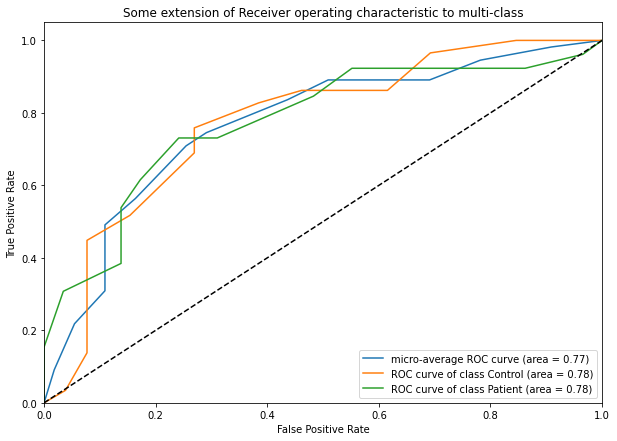

In [44]:
ROC(y_score,cls)

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

# With Ploty

In [45]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/HMC_WITH_BIOM.csv'
#data="https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv"
dataset = pd.read_csv(data)

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values



# Fit the model
model = LogisticRegression(max_iter=200)
model.fit(X, y)
y_scores = model.predict_proba(X)

# One hot encode the labels in order to plot them
y_onehot = pd.get_dummies(y, columns=model.classes_)

# Create an empty figure, and iteratively add new lines
# every time we compute a new class
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_scores.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_scores[:, i]

    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)

    name = f"{y_onehot.columns[i]} (AUC={auc_score:.2f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=1000, height=1000
)
fig.show()
